In [1]:
!git clone https://github.com/CPShub/TutorialMLinSolidMechanics.git

Cloning into 'TutorialMLinSolidMechanics'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 225 (delta 39), reused 70 (delta 19), pack-reused 128 (from 1)
Receiving objects: 100% (225/225), 8.34 MiB | 22.47 MiB/s, done.
Resolving deltas: 100% (43/43), done.


In [6]:
import tensorflow as tf
from matplotlib import pyplot as plt
import datetime
now = datetime.datetime.now

import importlib

import TutorialMLinSolidMechanics.Winter_term_24_25.viscoelasticity.data as ld
importlib.reload(ld)

import TutorialMLinSolidMechanics.Winter_term_24_25.viscoelasticity.plots as lp
importlib.reload(lp)

import TutorialMLinSolidMechanics.Winter_term_24_25.viscoelasticity.core_naive_RNN as hc
importlib.reload(hc)



<module 'TutorialMLinSolidMechanics.Winter_term_24_25.viscoelasticity.core_naive_RNN' from '/content/TutorialMLinSolidMechanics/Winter_term_24_25/viscoelasticity/core_naive_RNN.py'>

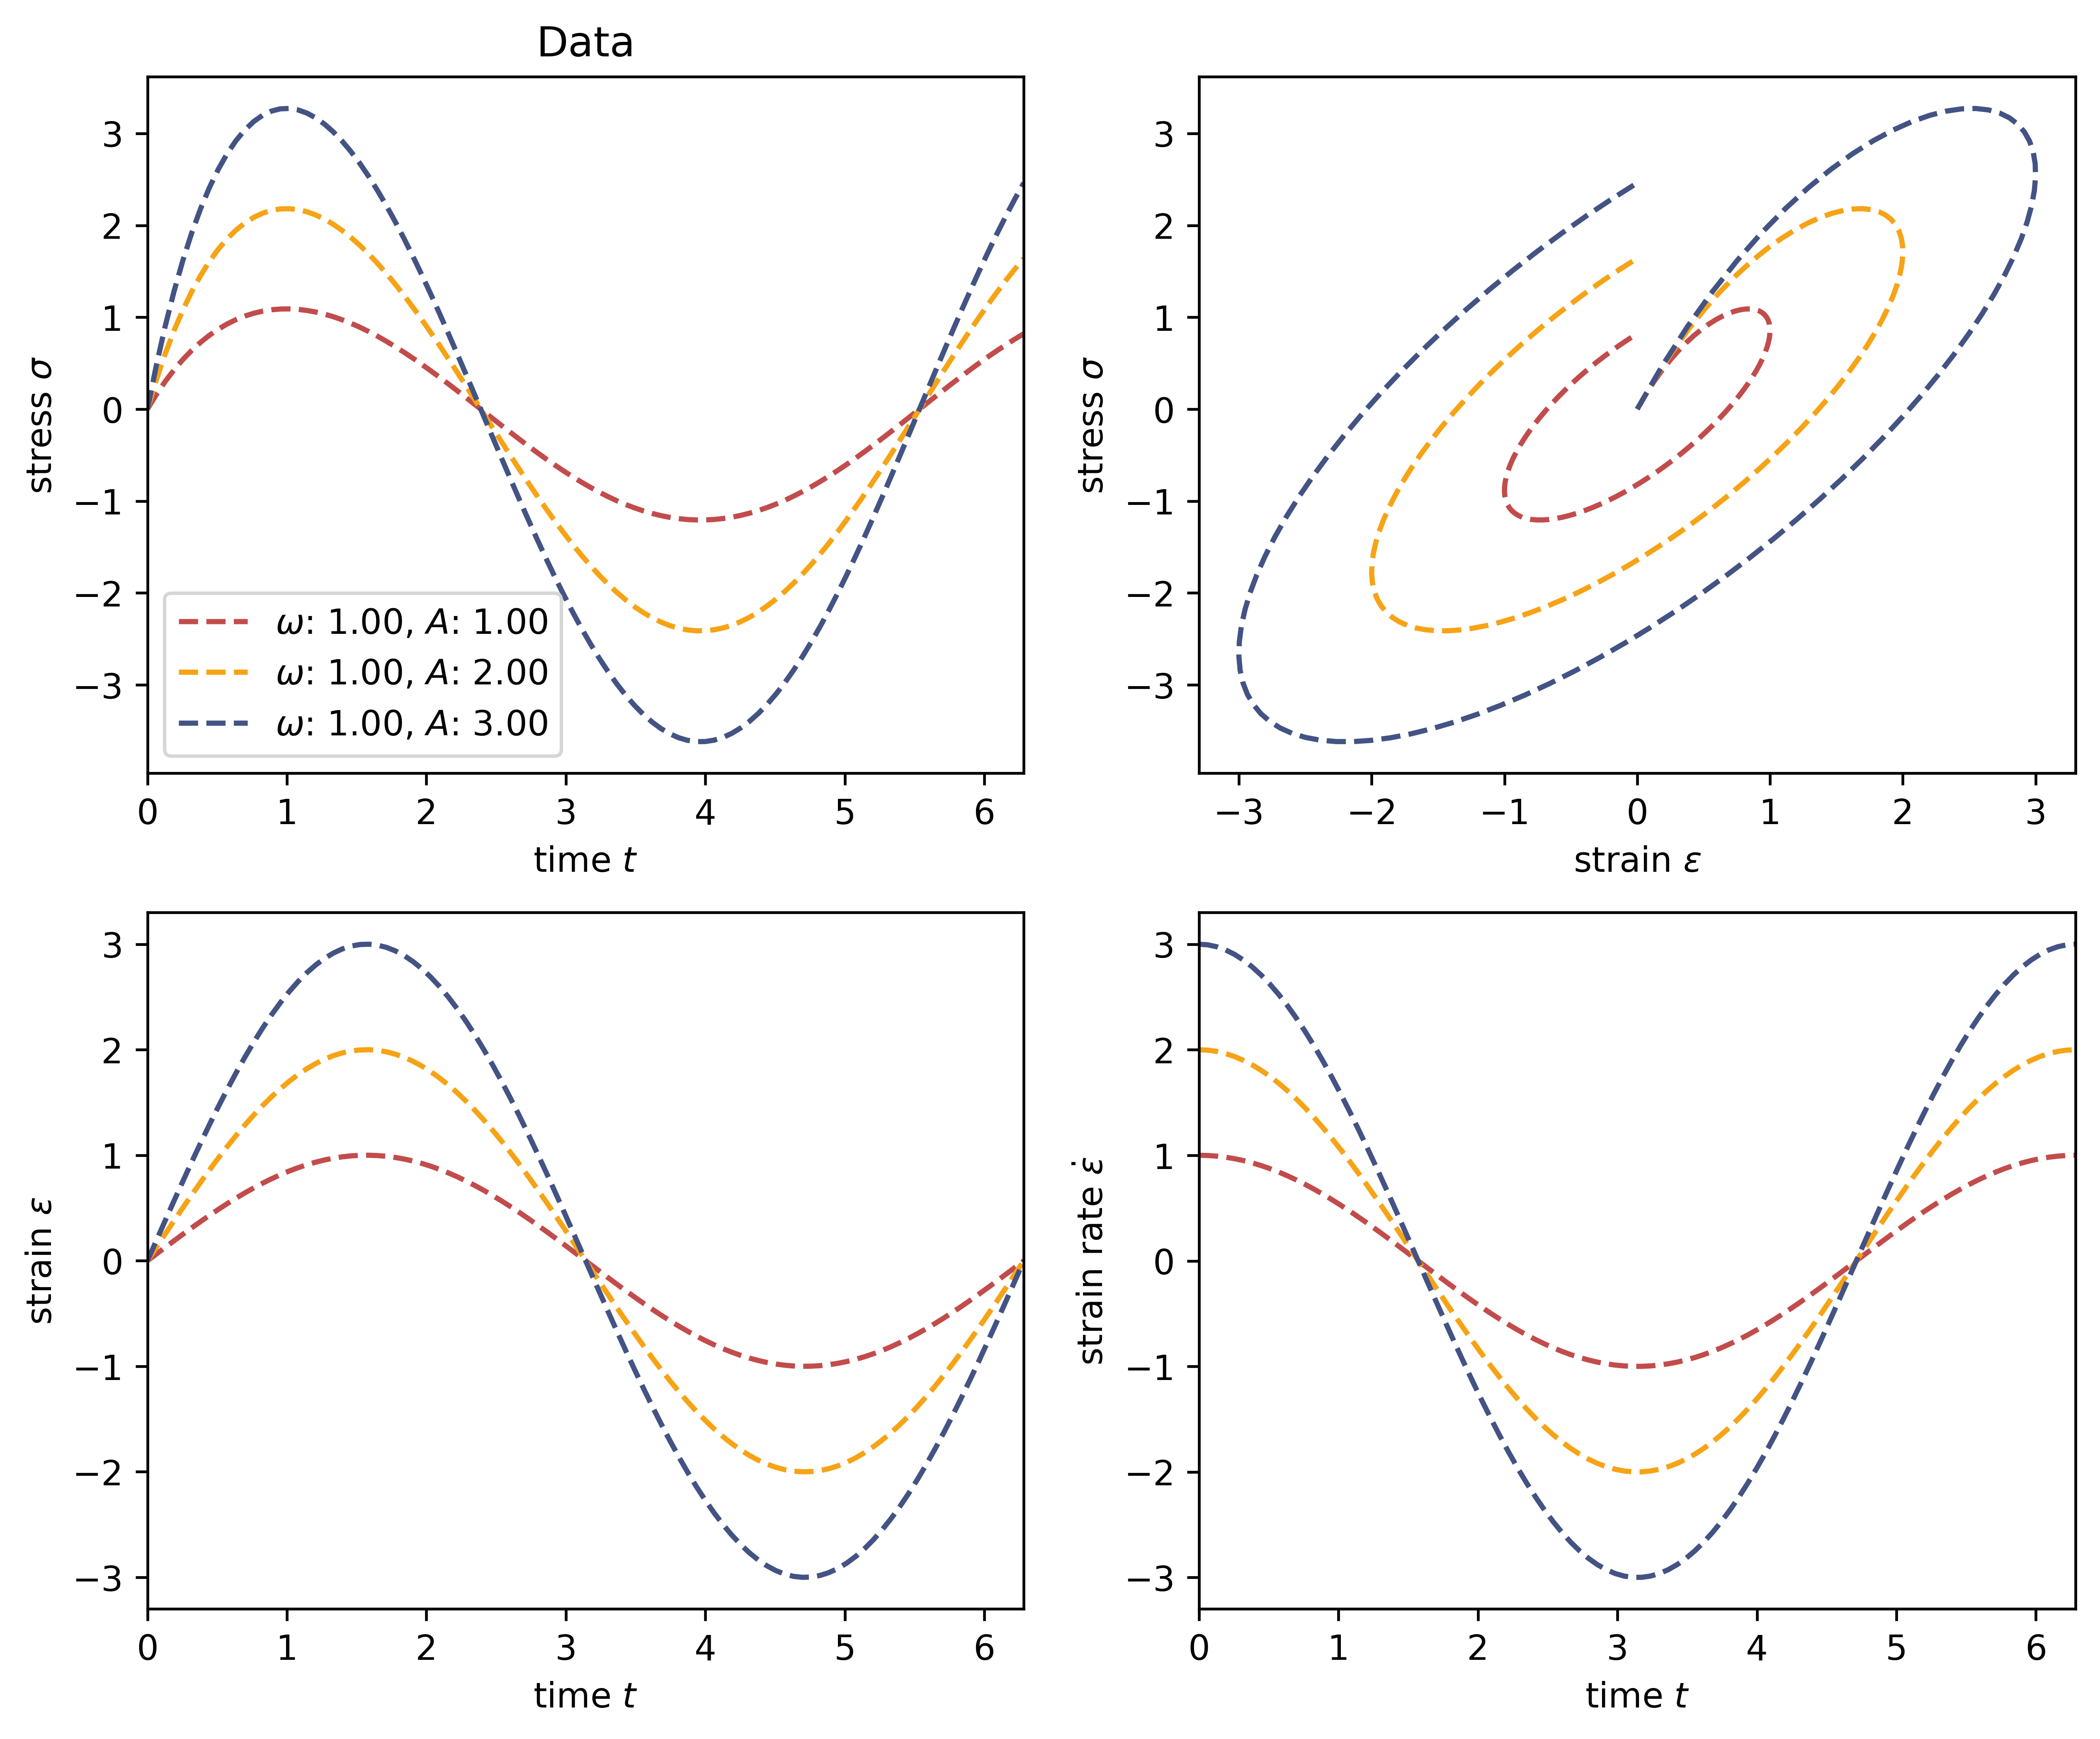

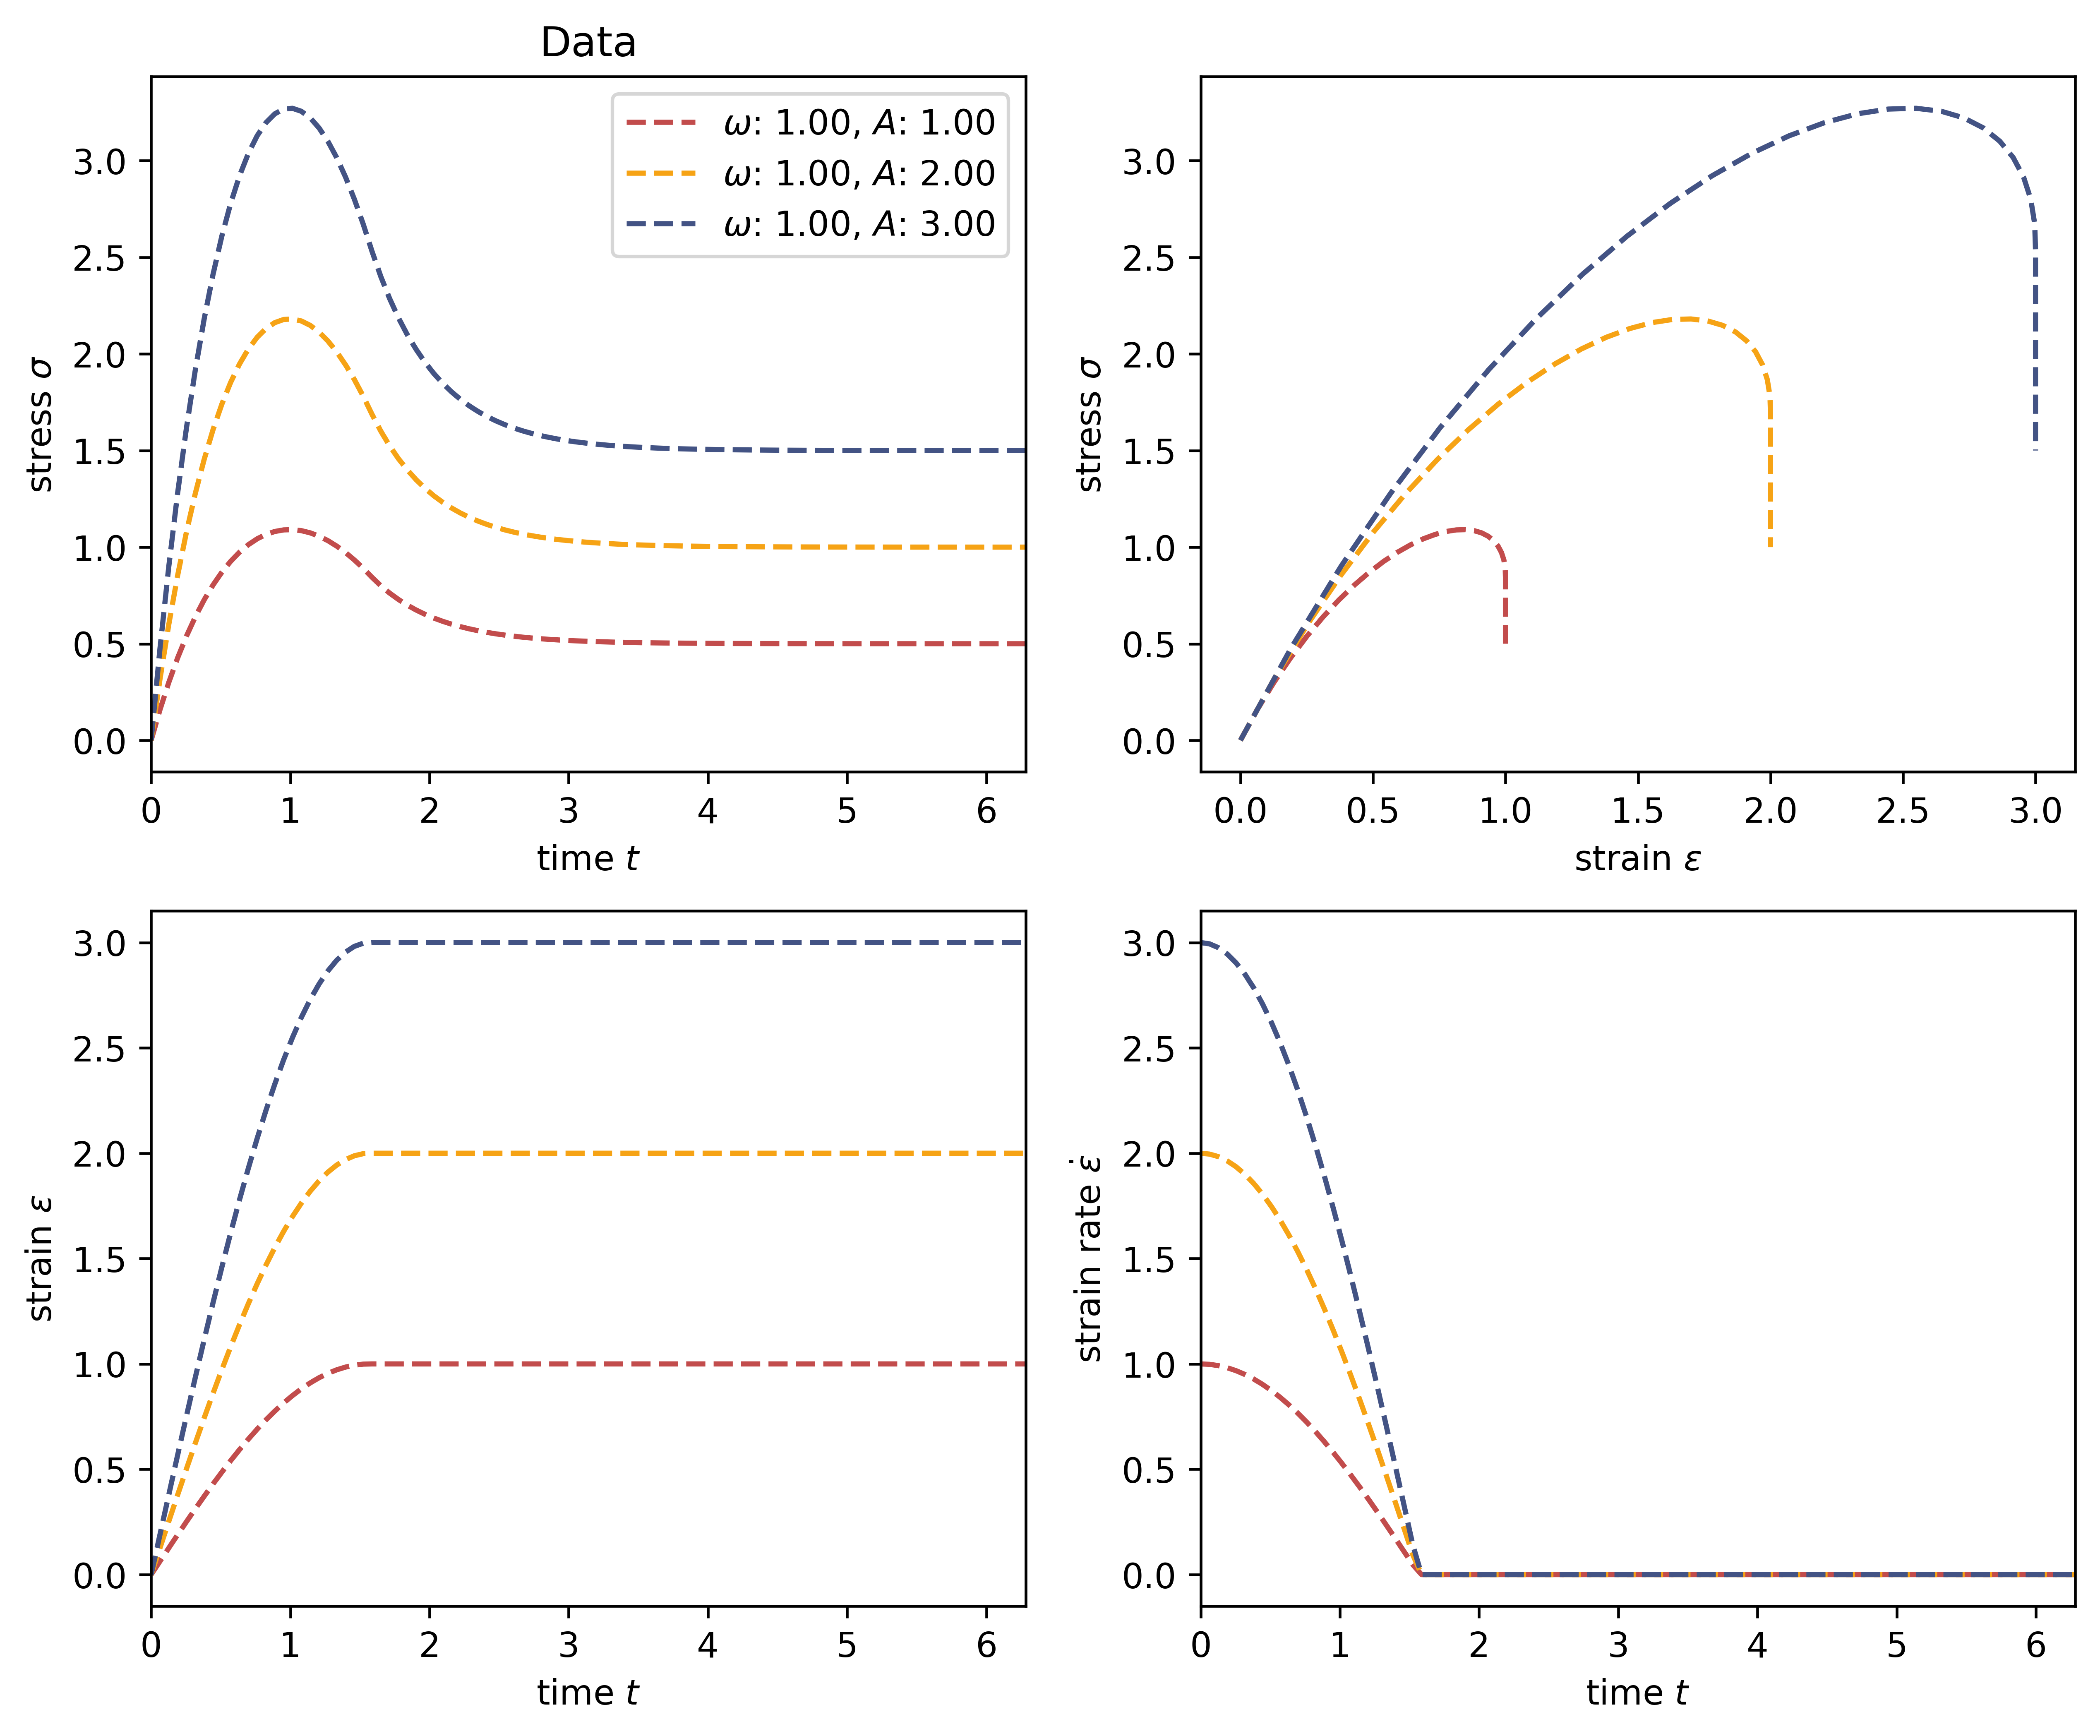

In [7]:
# Load and visualize data
E_infty = 0.5
E = 2
eta = 1

n = 100
omegas = [1,1,1]
As = [1,2,3]

eps, eps_dot, sig, dts = ld.generate_data_harmonic(E_infty, E, eta, n, omegas, As)
eps_rel, eps_dot_rel, sig_rel, dts_rel = ld.generate_data_relaxation(E_infty, E, eta, n, omegas, As)

lp.plot_data(eps, eps_dot, sig, omegas, As)
lp.plot_data(eps_rel, eps_dot_rel, sig_rel, omegas, As)

In [8]:
# Load and evaluate model
model = hc.main()

t1 = now()
print(t1)

model.optimizer.learning_rate.assign(0.002)

h = model.fit([eps, dts], [sig], epochs = 10000,  verbose = 2)

t2 = now()
print('it took', t2 - t1, '(sec) to calibrate the model')


plt.figure(1, dpi=100)
plt.semilogy(h.history['loss'], label='training loss', color=(67/255, 83/255, 132/255))
plt.grid(which='both')
plt.xlabel('calibration epoch')
plt.ylabel('MSE')
plt.legend()


2025-01-21 13:27:37.329880
Epoch 1/10000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'rnn_cell_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


1/1 - 2s - 2s/step - loss: 4.4775
Epoch 2/10000
1/1 - 0s - 49ms/step - loss: 4.2864
Epoch 3/10000
1/1 - 0s - 45ms/step - loss: 4.1087
Epoch 4/10000
1/1 - 0s - 56ms/step - loss: 3.9439
Epoch 5/10000
1/1 - 0s - 60ms/step - loss: 3.7917
Epoch 6/10000
1/1 - 0s - 58ms/step - loss: 3.6515
Epoch 7/10000
1/1 - 0s - 61ms/step - loss: 3.5227
Epoch 8/10000
1/1 - 0s - 57ms/step - loss: 3.4048
Epoch 9/10000
1/1 - 0s - 56ms/step - loss: 3.2971
Epoch 10/10000
1/1 - 0s - 70ms/step - loss: 3.1989
Epoch 11/10000
1/1 - 0s - 62ms/step - loss: 3.1095
Epoch 12/10000
1/1 - 0s - 57ms/step - loss: 3.0282
Epoch 13/10000
1/1 - 0s - 60ms/step - loss: 2.9541
Epoch 14/10000
1/1 - 0s - 128ms/step - loss: 2.8866
Epoch 15/10000
1/1 - 0s - 60ms/step - loss: 2.8249
Epoch 16/10000
1/1 - 0s - 55ms/step - loss: 2.7683
Epoch 17/10000
1/1 - 0s - 46ms/step - loss: 2.7161
Epoch 18/10000
1/1 - 0s - 60ms/step - loss: 2.6677
Epoch 19/10000
1/1 - 0s - 49ms/step - loss: 2.6224
Epoch 20/10000
1/1 - 0s - 45ms/step - loss: 2.5798
Epoc

KeyboardInterrupt: 

### Is the model able to predict seen data - Reproduce data?

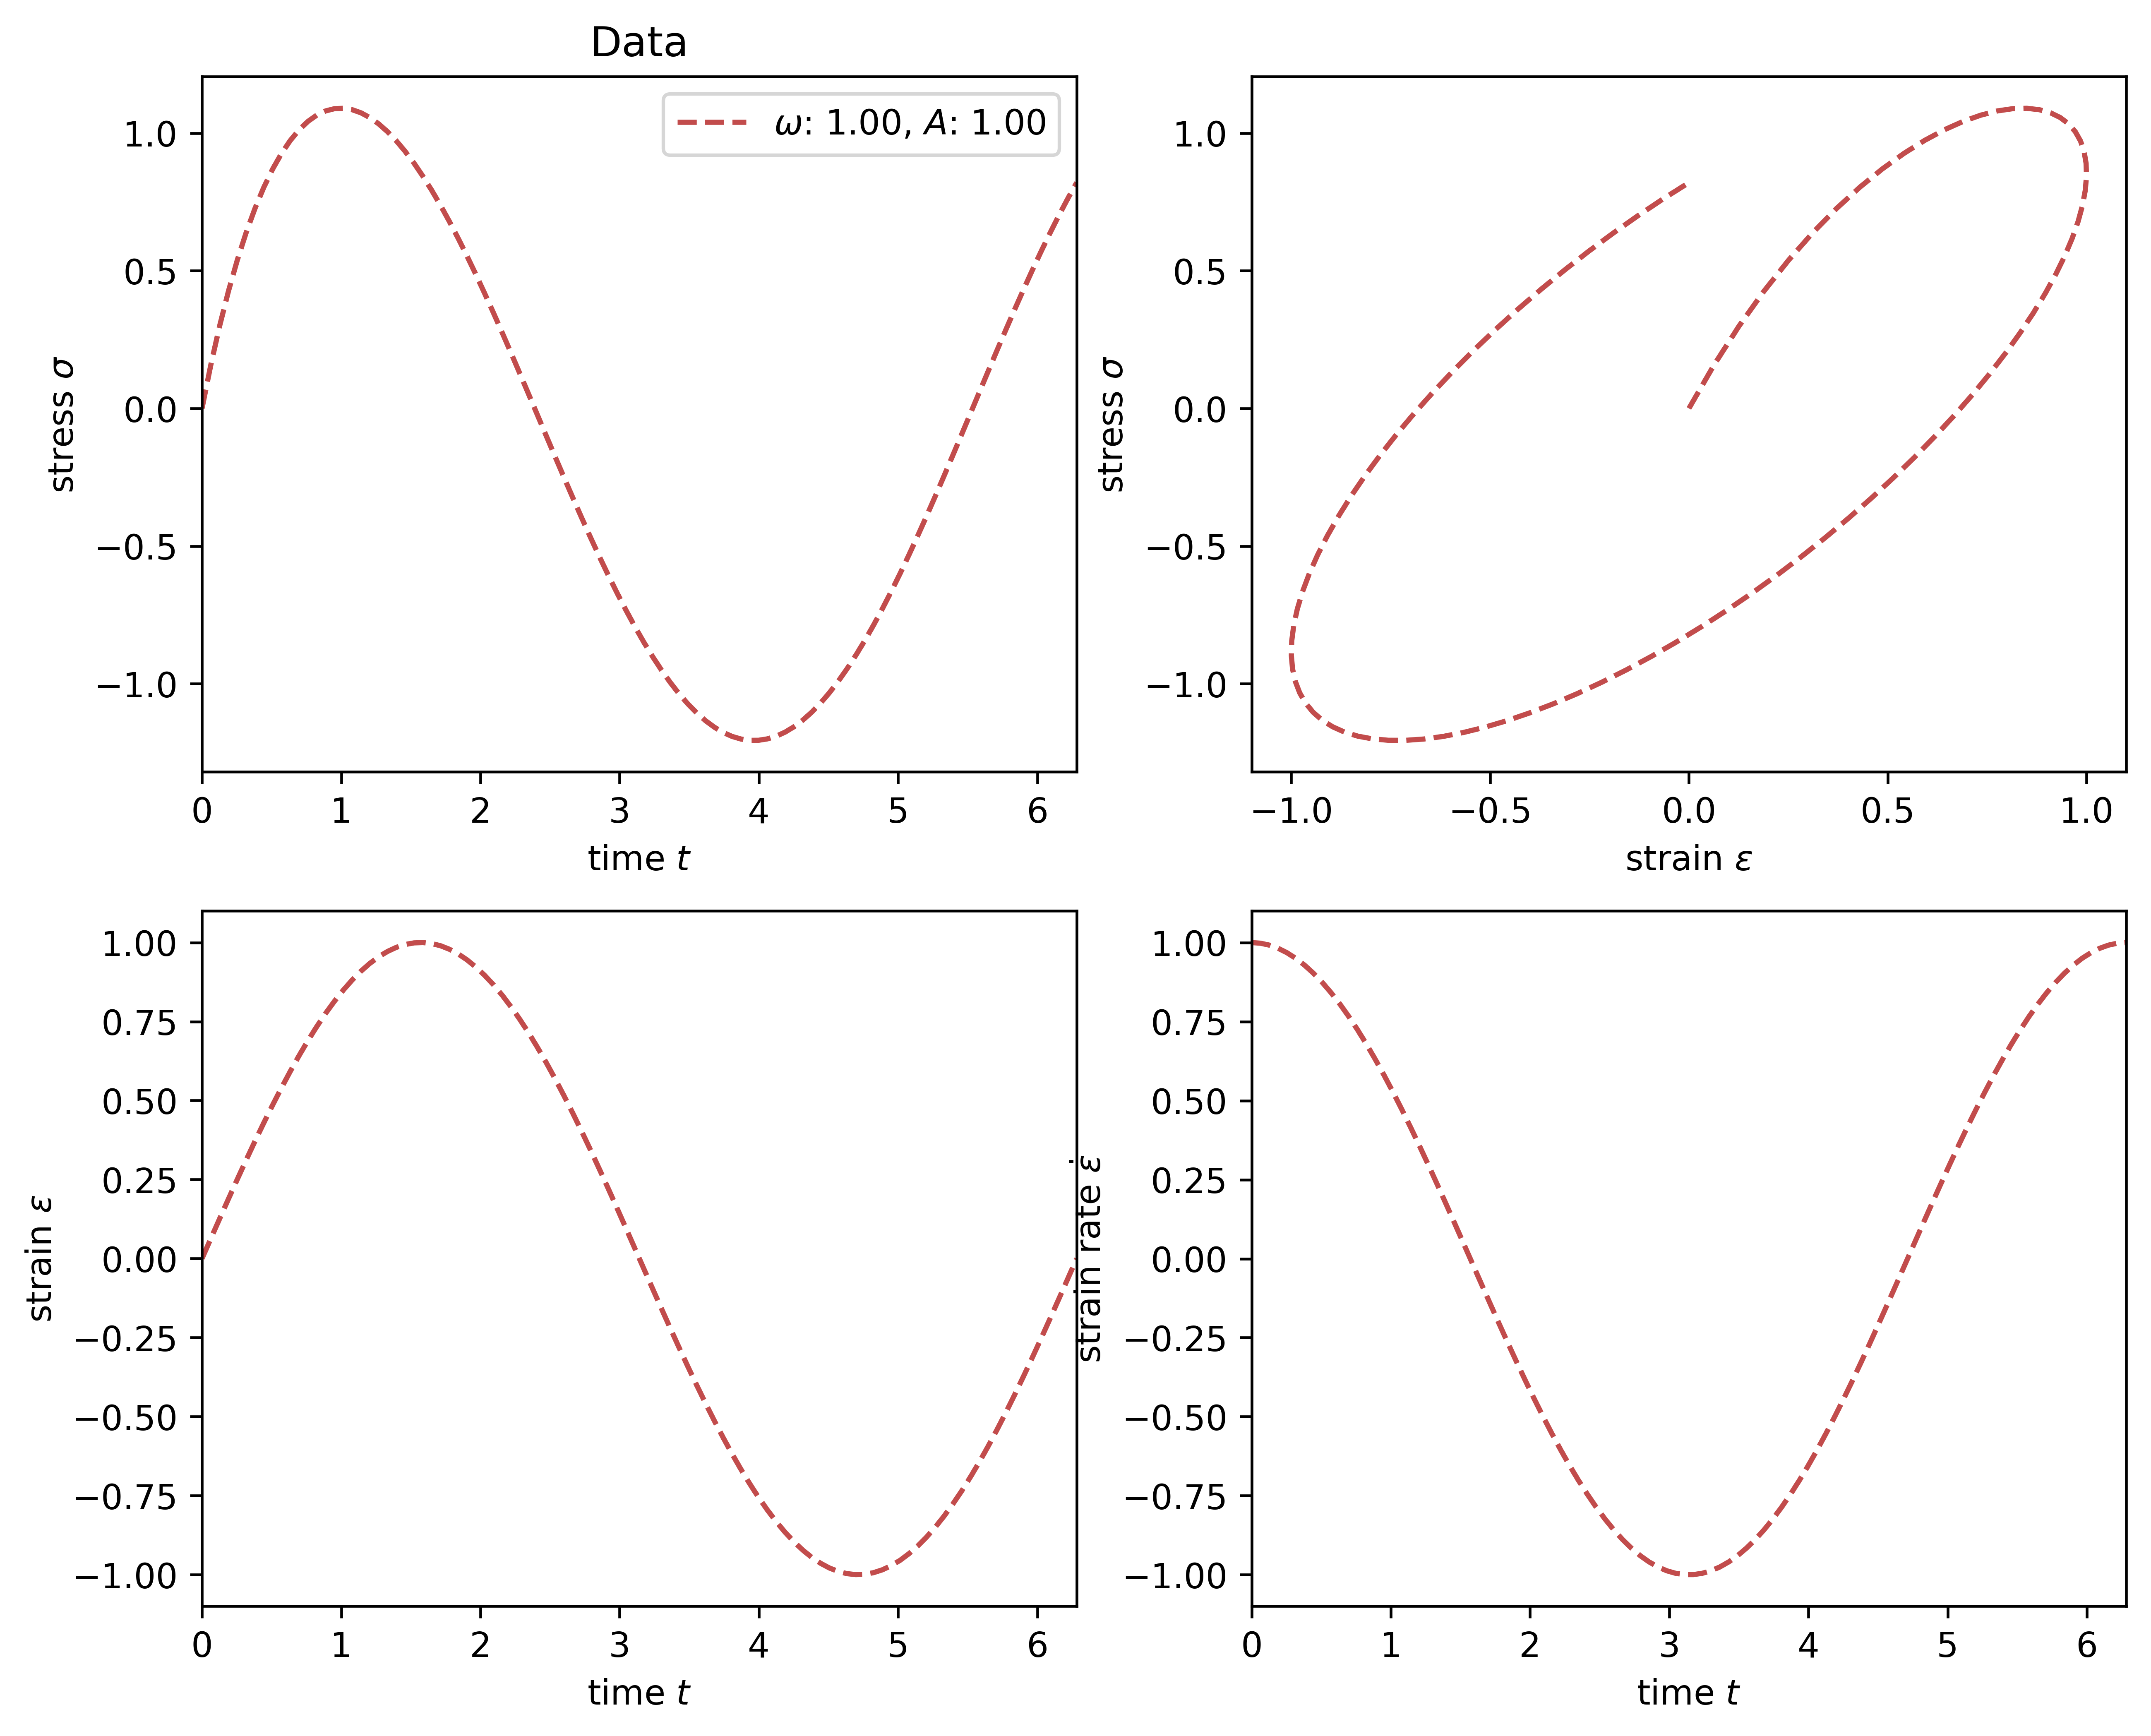

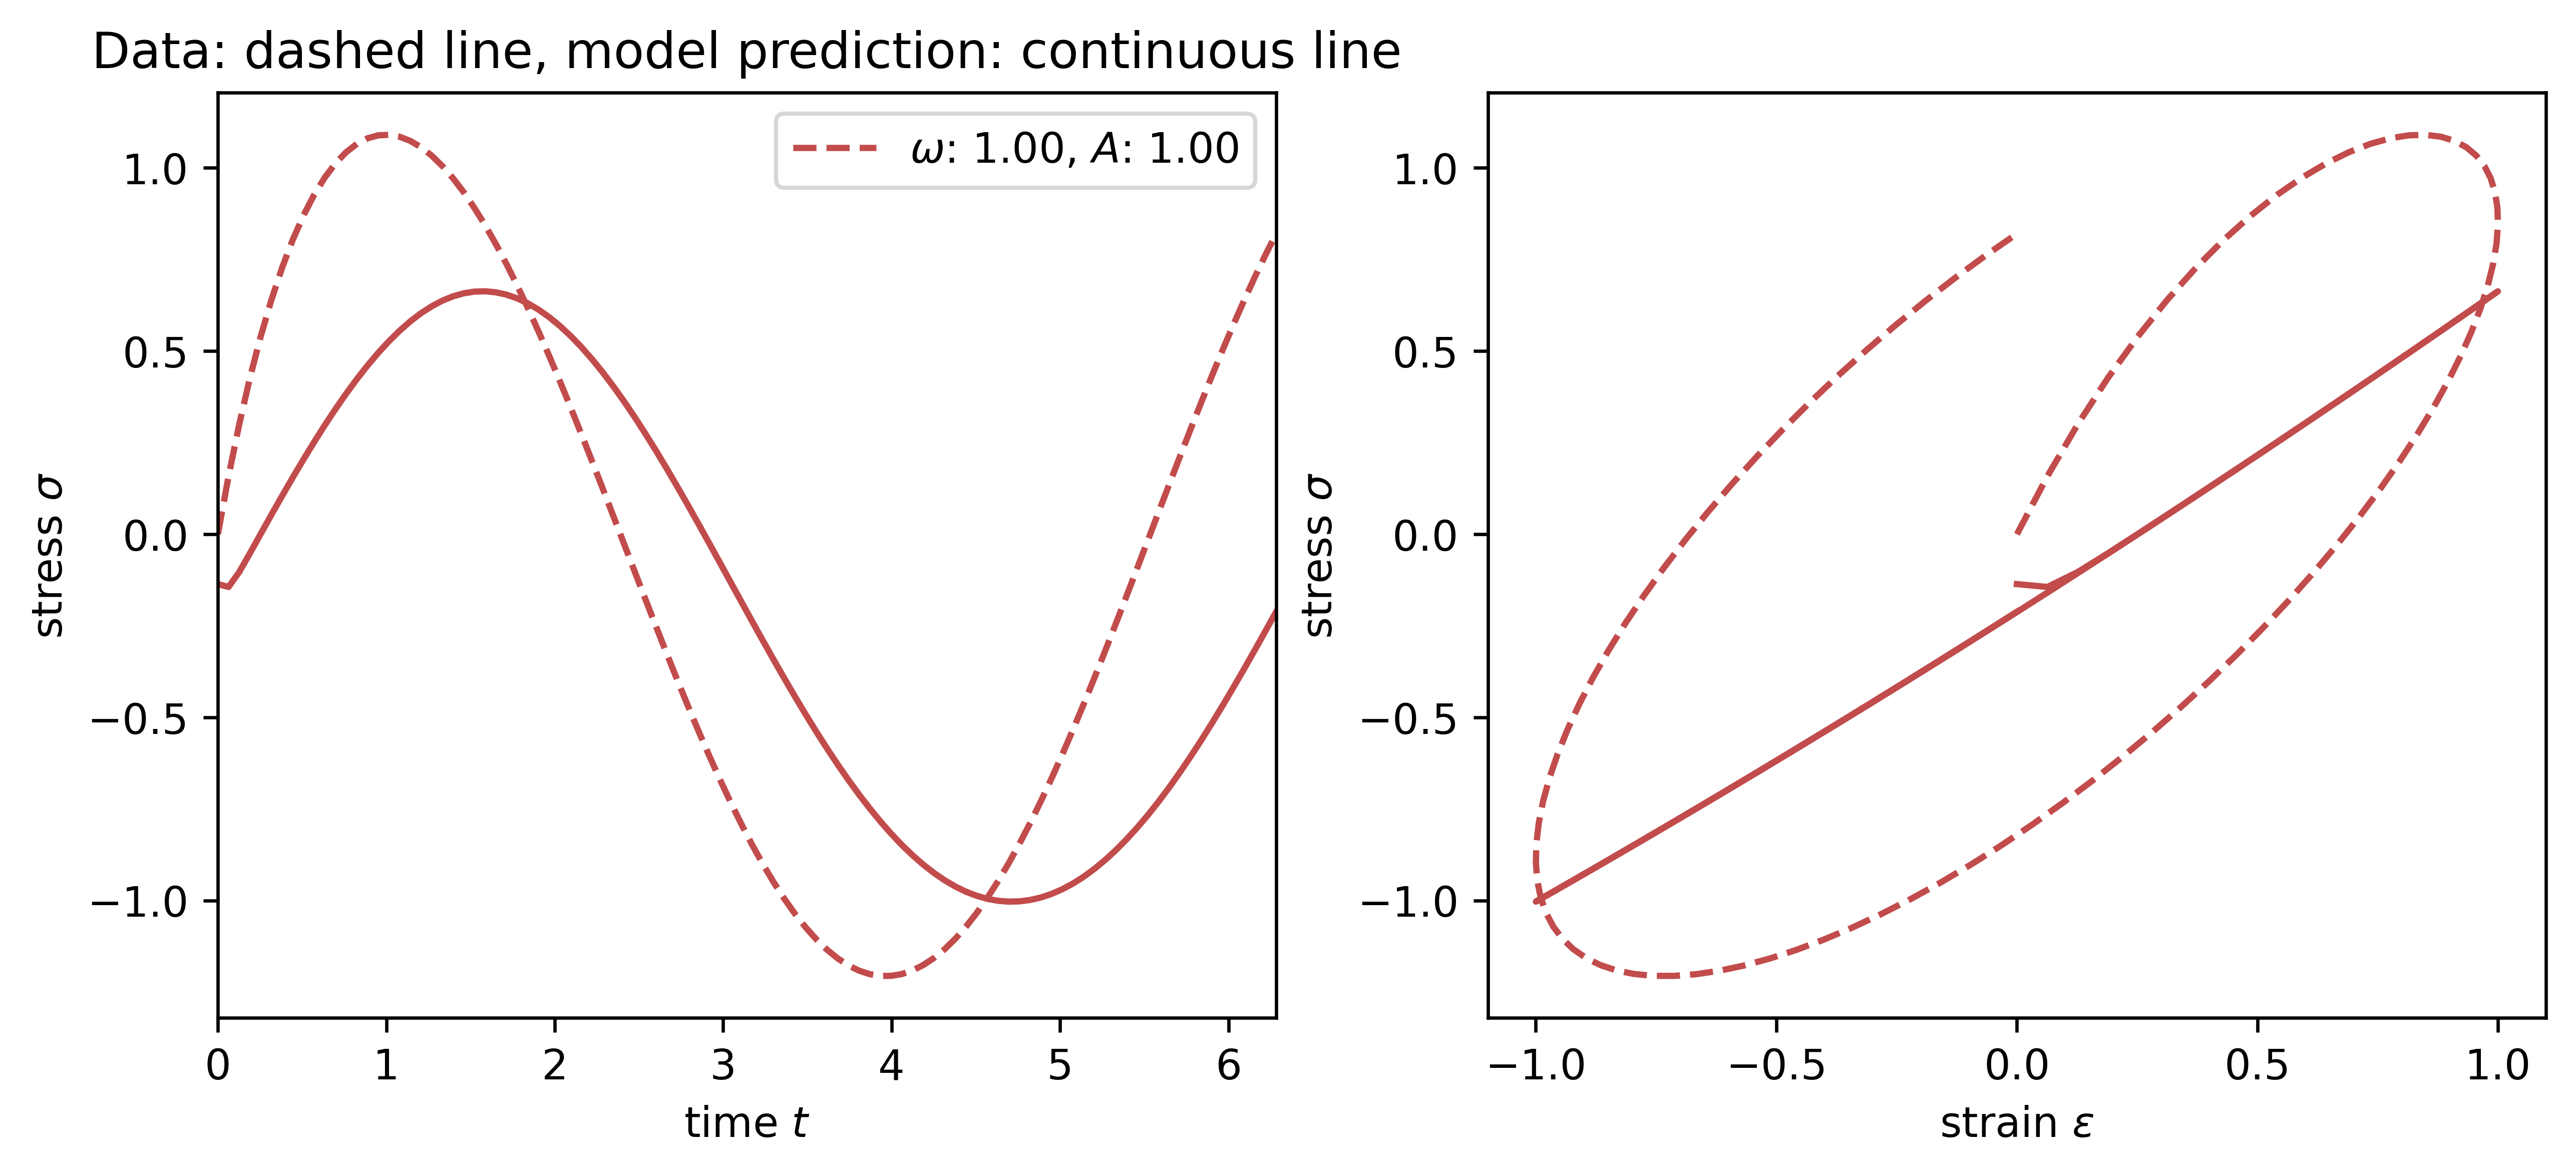

In [9]:
# Calibration data used for training
E_infty = 0.5
E = 2
eta = 1

n = 100
omegas = [1]
As = [1]

eps, eps_dot, sig, dts = ld.generate_data_harmonic(E_infty, E, eta, n, omegas, As)
sig_m = model([eps, dts])
lp.plot_data(eps, eps_dot, sig, omegas, As)
lp.plot_model_pred(eps, sig, sig_m, omegas, As)